In [87]:
import pandas as pd
import numpy as np
import pytorch_forecasting as ptf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt

In [4]:
seasonal_file = 'SPCS20RSA.xlsx'
nonseasonal_file = 'SPCS20RNSA.xlsx'
seasonal_df = pd.read_excel(seasonal_file, sheet_name='Monthly', index_col=0, parse_dates=True)
nonseasonal_df = pd.read_excel(nonseasonal_file, sheet_name='Monthly', index_col=0, parse_dates=True)

In [5]:
seasonal_df['Seasonal Growth Rates'] = np.log(seasonal_df['SPCS20RSA']).diff()
nonseasonal_df['Not Seasonal Growth Rates'] = np.log(nonseasonal_df['SPCS20RNSA']).diff()
seasonal_df = seasonal_df.dropna()
nonseasonal_df = nonseasonal_df.dropna()

In [ ]:
seasonal_df

,SPCS20RNSA,Not Seasonal Growth Rates
observation_date,,
2000-02-01,100.757407,0.007546
2000-03-01,101.945281,0.011720
2000-04-01,103.501369,0.015149
2000-05-01,105.197072,0.016251
2000-06-01,106.757314,0.014723


Non-seasonally Adjusted Data 48 Lags

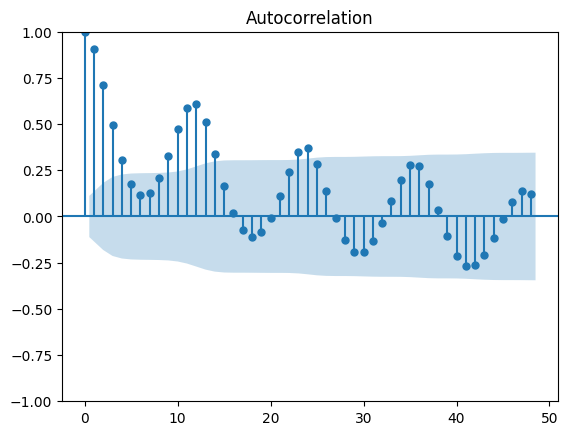

In [7]:
nonseasonalacf = plot_acf(nonseasonal_df['Not Seasonal Growth Rates'], lags=48)

AR[1] Non-seasonally Adjusted Model

In [8]:
nonseasonalar1model = AutoReg(nonseasonal_df['Not Seasonal Growth Rates'], lags=1).fit()
print(nonseasonalar1model.summary())

                                AutoReg Model Results                                
Dep. Variable:     Not Seasonal Growth Rates   No. Observations:                  309
Model:                            AutoReg(1)   Log Likelihood                1260.451
Method:                      Conditional MLE   S.D. of innovations              0.004
Date:                       Wed, 14 Jan 2026   AIC                          -2514.901
Time:                               11:33:38   BIC                          -2503.711
Sample:                           03-01-2000   HQIC                         -2510.427
                                - 10-01-2025                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0003      0.000      1.291      0.197      -0.000       0.001
Not Seasonal Growth R

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Seasonal Data 48 Lags

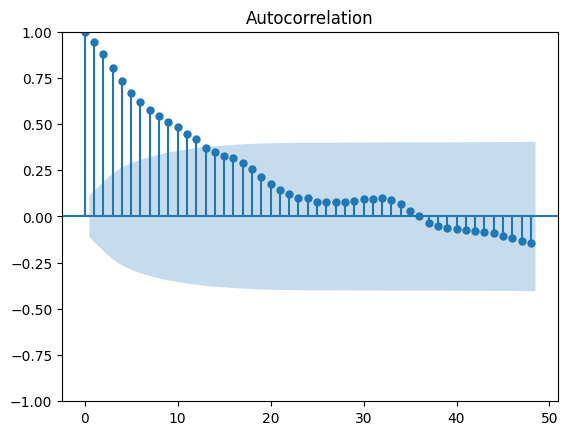

In [9]:
seasonal_acf = plot_acf(seasonal_df['Seasonal Growth Rates'], lags=48)

AR[1] Seasonally Adjusted Model

In [174]:
seasonalar1model = AutoReg(seasonal_df['Seasonal Growth Rates'], lags=1).fit()
seasonalar1model.summary()

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              AutoReg Model Results                              
=================================================================================
Dep. Variable:     Seasonal Growth Rates   No. Observations:                  309
Model:                        AutoReg(1)   Log Likelihood                1398.598
Method:                  Conditional MLE   S.D. of innovations              0.003
Date:                   Thu, 15 Jan 2026   AIC                          -2791.197
Time:                           13:58:56   BIC                          -2780.006
Sample:                       03-01-2000   HQIC                         -2786.722
                            - 10-01-2025                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0002      0.000      1.201      0.230      -0.000       0.001
Seasonal Growth Rates.L1     0.9435      0.019     50.554      0.000       0.907       0.980
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0599           +0.0000j            1.0599            0.0000
-----------------------------------------------------------------------------
"""

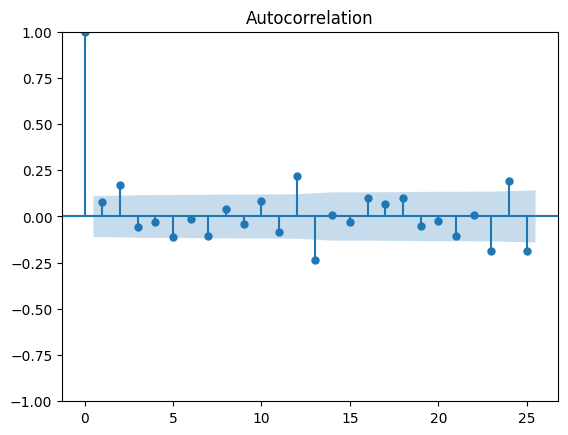

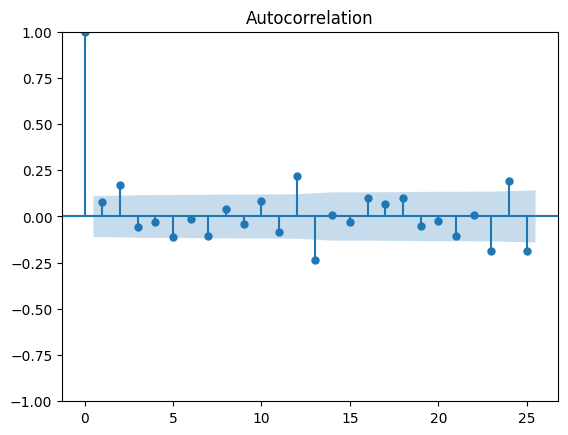

In [158]:
plot_acf(seasonalar1model.resid)

PACF to find better fitting AR(p) model

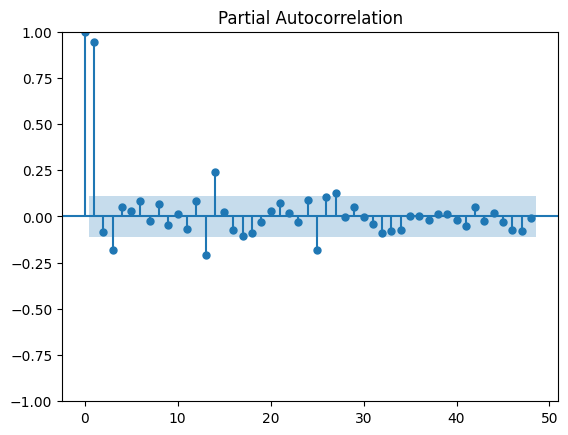

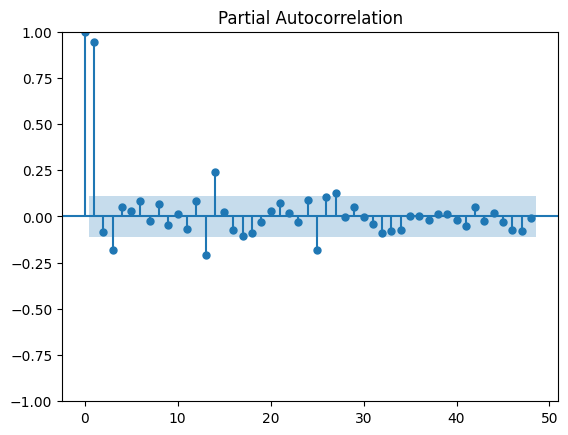

In [161]:
plot_pacf(seasonal_df['Seasonal Growth Rates'], lags=48)


In [192]:
seasonalar14model = AutoReg(seasonal_df['Seasonal Growth Rates'], lags=14).fit()
seasonalar14model.summary()

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              AutoReg Model Results                              
=================================================================================
Dep. Variable:     Seasonal Growth Rates   No. Observations:                  309
Model:                       AutoReg(14)   Log Likelihood                1363.112
Method:                  Conditional MLE   S.D. of innovations              0.002
Date:                   Thu, 15 Jan 2026   AIC                          -2694.224
Time:                           14:18:10   BIC                          -2635.233
Sample:                       04-01-2001   HQIC                         -2670.603
                            - 10-01-2025                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0002      0.000      1.110      0.267      -0.000       0.000
Seasonal Growth Rates.L1      1.1013      0.056     19.543      0.000       0.991       1.212
Seasonal Growth Rates.L2     -0.0342      0.080     -0.425      0.671      -0.192       0.124
Seasonal Growth Rates.L3     -0.1470      0.079     -1.872      0.061      -0.301       0.007
Seasonal Growth Rates.L4     -0.0231      0.079     -0.293      0.769      -0.178       0.131
Seasonal Growth Rates.L5      0.0194      0.079      0.247      0.805      -0.135       0.174
Seasonal Growth Rates.L6      0.0212      0.079      0.269      0.788      -0.133       0.175
Seasonal Growth Rates.L7     -0.0572      0.079     -0.728      0.467      -0.211       0.097
Seasonal Growth Rates.L8      0.0955      0.079      1.215      0.225      -0.059       0.250
Seasonal Growth Rates.L9     -0.0444      0.079     -0.564      0.573      -0.199       0.110
Seasonal Growth Rates.L10     0.0399      0.079      0.507      0.612      -0.114       0.194
Seasonal Growth Rates.L11    -0.0951      0.079     -1.210      0.226      -0.249       0.059
Seasonal Growth Rates.L12     0.3050      0.078      3.889      0.000       0.151       0.459
Seasonal Growth Rates.L13    -0.4868      0.080     -6.059      0.000      -0.644      -0.329
Seasonal Growth Rates.L14     0.2520      0.056      4.479      0.000       0.142       0.362
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0330           -0.0000j            1.0330           -0.5000
AR.2            -0.9263           -0.5260j            1.0652           -0.4178
AR.3            -0.9263           +0.5260j            1.0652            0.4178
AR.4            -0.5786           -0.9102j            1.0785           -0.3401
AR.5            -0.5786           +0.9102j            1.0785            0.3401
AR.6            -0.0512           -1.1138j            1.1150           -0.2573
AR.7            -0.0512           +1.1138j            1.1150            0.2573
AR.8             0.4840           -1.0277j            1.1360           -0.1800
AR.9             0.4840           +1.0277j            1.1360            0.1800
AR.10            0.8985           -0.6770j            1.1250           -0.1028
AR.11            0.8985           +0.6770j            1.1250            0.1028
AR.12            1.0532           -0.0000j            1.0532           -0.0000
AR.13            1.1294           -0.2921j            1.1665           -0.0403
AR.14            1.1294           +0.2921j            1.1665            0.0403
------------------------------------------------------------------------------
"""

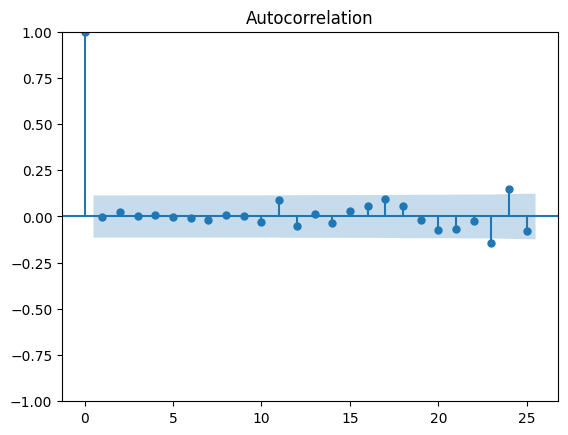

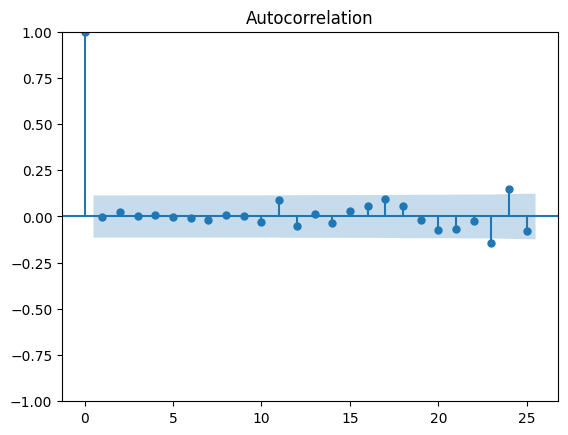

In [164]:
plot_acf(seasonalar14model.resid)

Nonseasonal forecasts compared to real data

In [194]:
seasonal_forecast = seasonalar14model.predict()
results = pd.DataFrame(
    {
        'Actual': seasonal_df['Seasonal Growth Rates'],
        'Forecast': seasonal_forecast
    }
)

<Axes: >

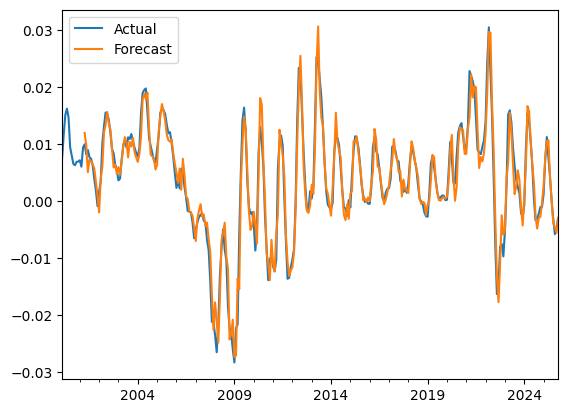

In [36]:
results.plot()

One step ahead out of sample forecast and prediction interval

In [204]:
onestepahead = seasonalar14model.get_prediction(start=len(seasonal_df), end=len(seasonal_df))
onestepahead.summary_frame(alpha=0.05)

/Users/ericbeechen/MSFM/Winter2026/Time Series/HW/.venv/lib/python3.13/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


,mean,mean_se,mean_ci_lower,mean_ci_upper
2025-11-01,0.003137,0.002382,-0.001533,0.007806


Consider the first order model: Yt = 0.1 + 0.99Yt-1 + et where et is iidN(0,0.5^2)

In [168]:
mu = 0.1/(1 - 0.99)
sigma = (0.5**2)/(1 - 0.99**2)
mu, sigma

(9.999999999999991, 12.56281407035174)

In [169]:
parameters = []
for _ in range(1000):
    YtLag = np.random.normal(mu, sigma)
    results = []
    for _ in range(100):
        Yt = 0.1 + 0.99*YtLag + np.random.normal(0, 0.5**2)
        YtLag = Yt
        results.append(Yt)
    model = AutoReg(results, lags=1).fit()
    parameters.append(float(model.params[1]))

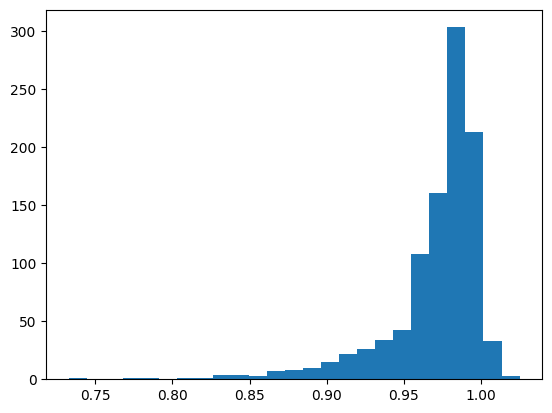

In [170]:
ar_hist = plt.hist(parameters, bins=25)

In [171]:
estimated_mean = float(np.mean(parameters))
estimated_mean

0.9703413961290598

Consider the model yt = 0.5 + 1.3yt-1 - 0.45yt-2 + et

In [172]:
mean_ar2 = 0.5/(1 - 1.3 + 0.45)

In [173]:
mean_ar2

3.333333333333334